<a href="https://colab.research.google.com/github/zzf7ktx/test_git/blob/main/ai_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
data_url = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'

In [ ]:
import zipfile
import numpy as np
import pandas as pd

class MovieLens1m:
  def __init__(self, url: str):
    self.url = url
    self.__download()
    self.__read_users()
    self.__read_movies()
    self.__read_ratings()
    !rm ml-1m.zip
    !rm -rf ml-1m

  def __download(self):
    print('Downloading')
    zip_path = 'ml-1m.zip'
    !wget {data_url} -O {zip_path}

    print('Extracting')
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall()
    self.base_path = 'ml-1m'

  def __read_ratings(self, filename='ratings.dat'):
    print('Reading ratings')
    headers = ['u_nodes', 'v_nodes', 'ratings', 'timestamp']
    dtypes = {
      'u_nodes': np.int64, 'v_nodes': np.int64,
      'ratings': np.float32, 'timestamp': np.float64
    }
    sep = r'\:\:'
    file_path = self.base_path + '/' + filename
    self.ratings_df = pd.read_csv(file_path, sep=sep, header=None,
                       names=headers,
                       converters=dtypes, engine='python',
                       encoding='latin-1')

  def __read_users(self, filename='users.dat'):
    print('Reading users')
    headers = ['user_id', 'gender', 'age', 'occupation', 'zip-code']
    sep = r'\:\:'
    file_path = self.base_path + '/' + filename
    self.users_df = pd.read_csv(file_path, sep=sep,header = None,
                       names = headers, engine= 'python',
                       encoding='latin-1')

  def __read_movies(self, filename='movies.dat'):
    print('Reading movies')
    headers = ['movie_id', 'title', 'genre']
    sep = r'\:\:'
    file_path = self.base_path + '/' + filename
    self.movies_df = pd.read_csv(file_path, sep=sep,header = None,
                       names = headers, engine= 'python',
                       encoding='latin-1')

In [ ]:
dataset = MovieLens1m(data_url)

Downloading
--2025-07-06 13:00:31--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  8.65MB/s    in 0.7s    

2025-07-06 13:00:32 (8.65 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Extracting
Reading users
Reading movies
Reading ratings


In [ ]:
dataset.ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   u_nodes    1000209 non-null  int64  
 1   v_nodes    1000209 non-null  int64  
 2   ratings    1000209 non-null  float32
 3   timestamp  1000209 non-null  float64
dtypes: float32(1), float64(1), int64(2)
memory usage: 26.7 MB


In [ ]:
dataset.ratings_df.isna().sum()

,0
u_nodes,0
v_nodes,0
ratings,0
timestamp,0


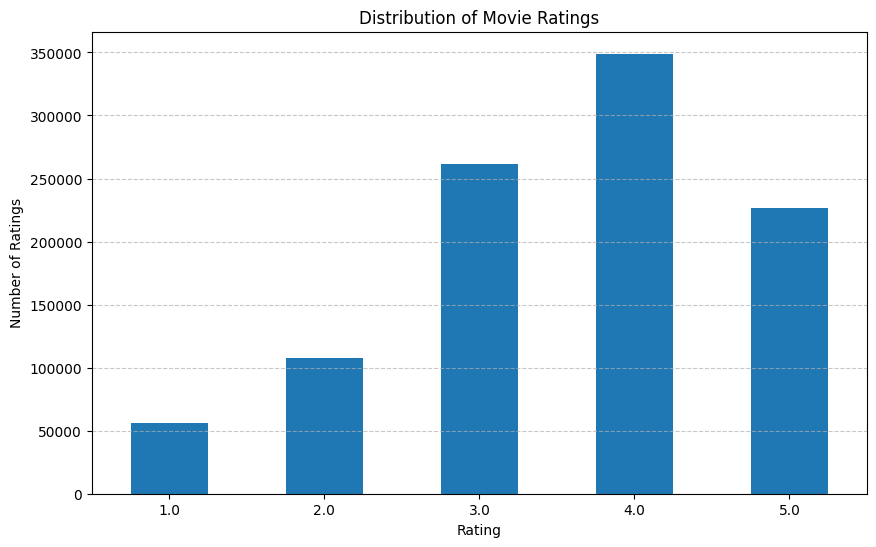

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset.ratings_df['ratings'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

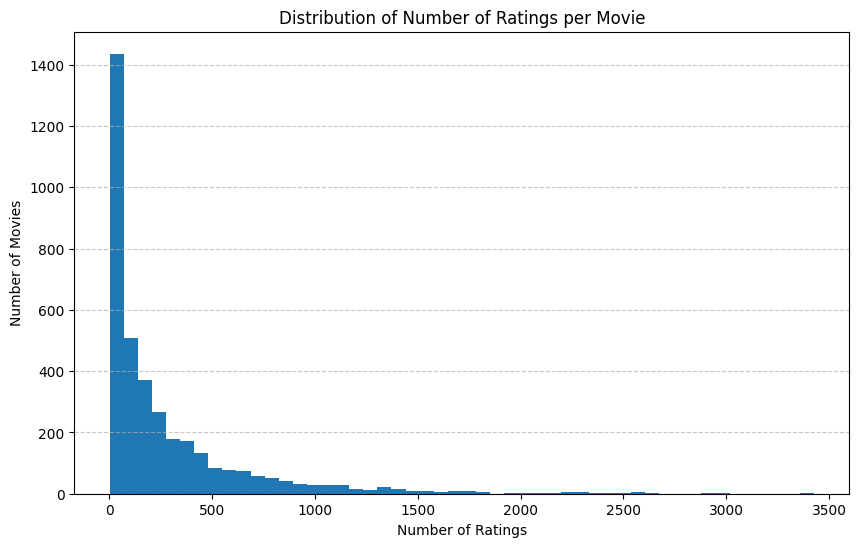

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dataset.ratings_df['v_nodes'].value_counts().plot(kind='hist', bins=50)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

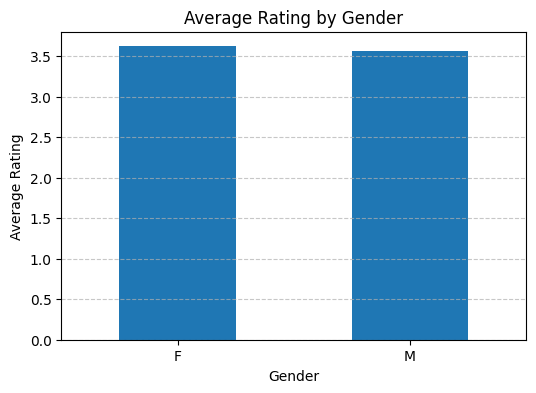

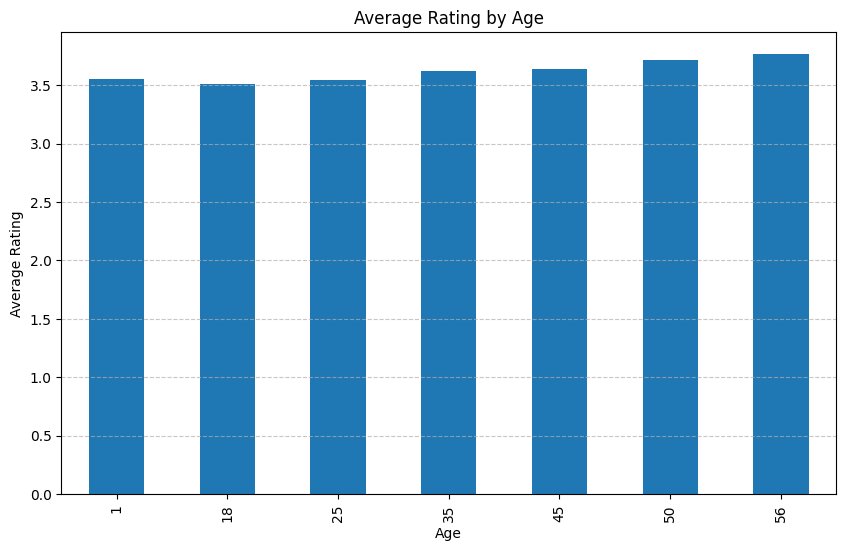

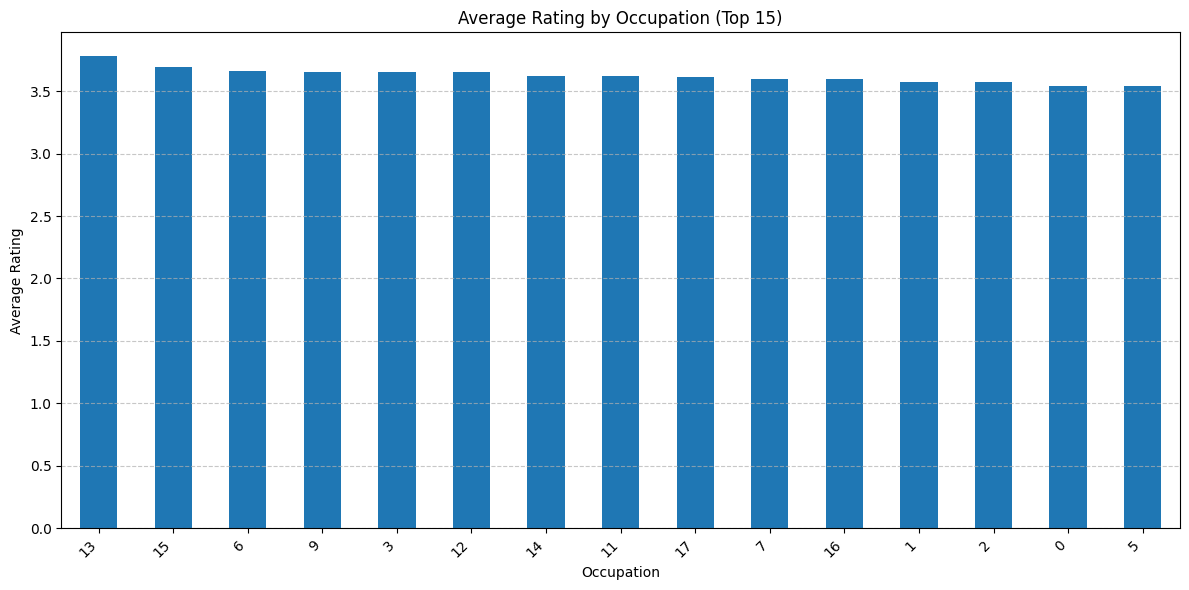

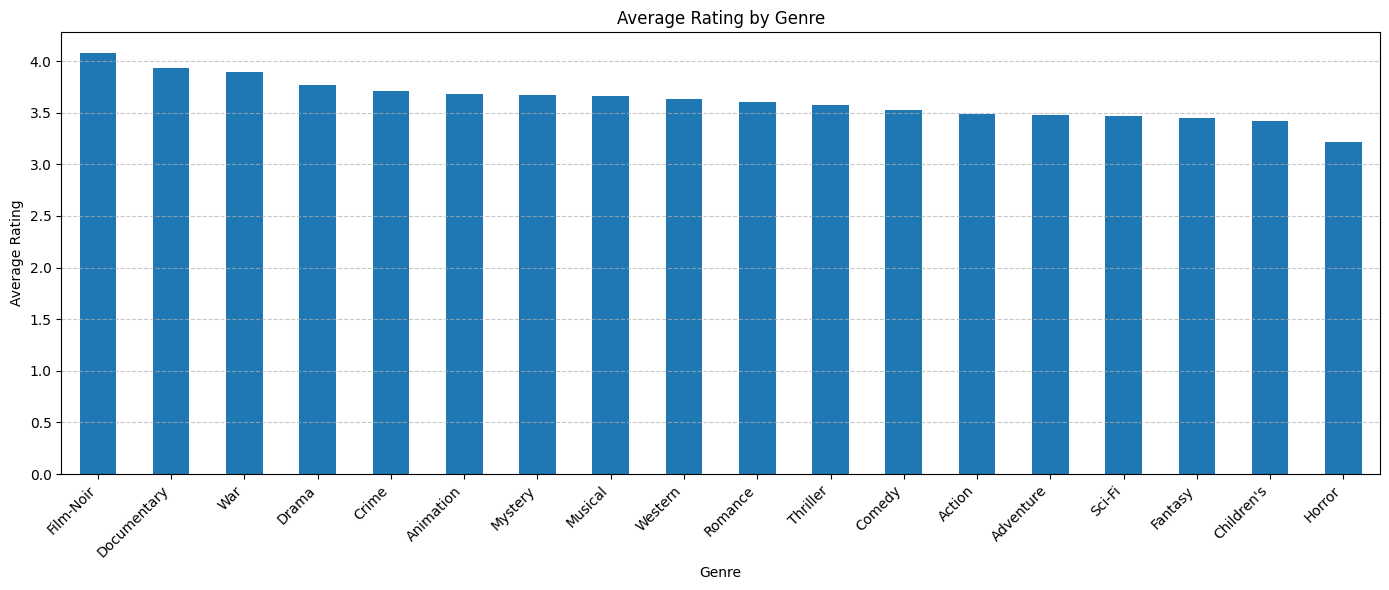

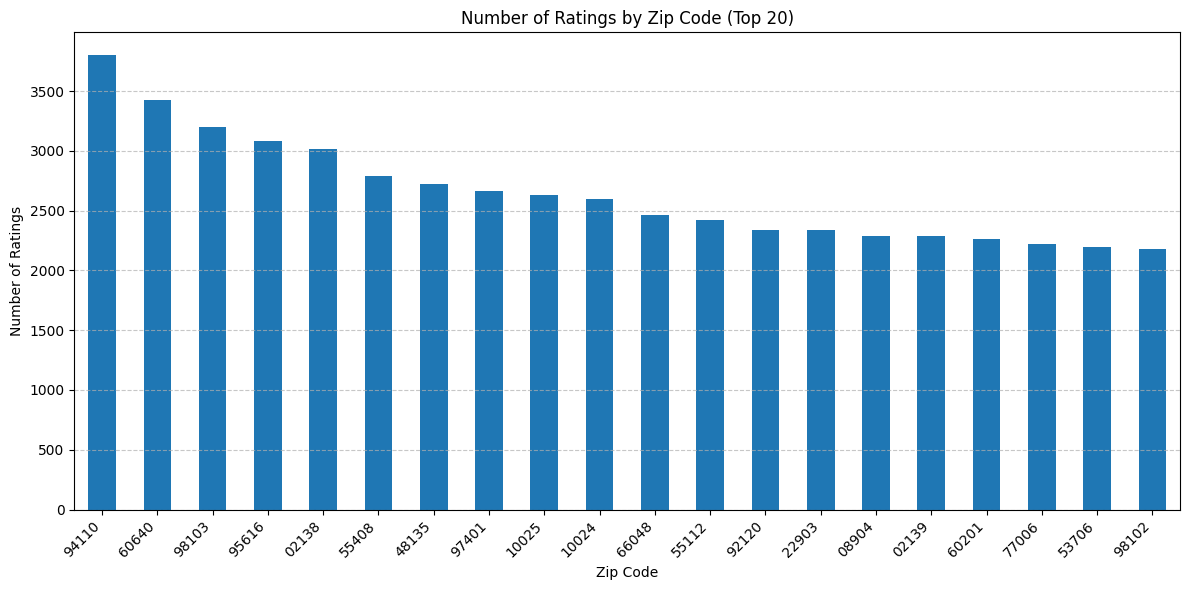

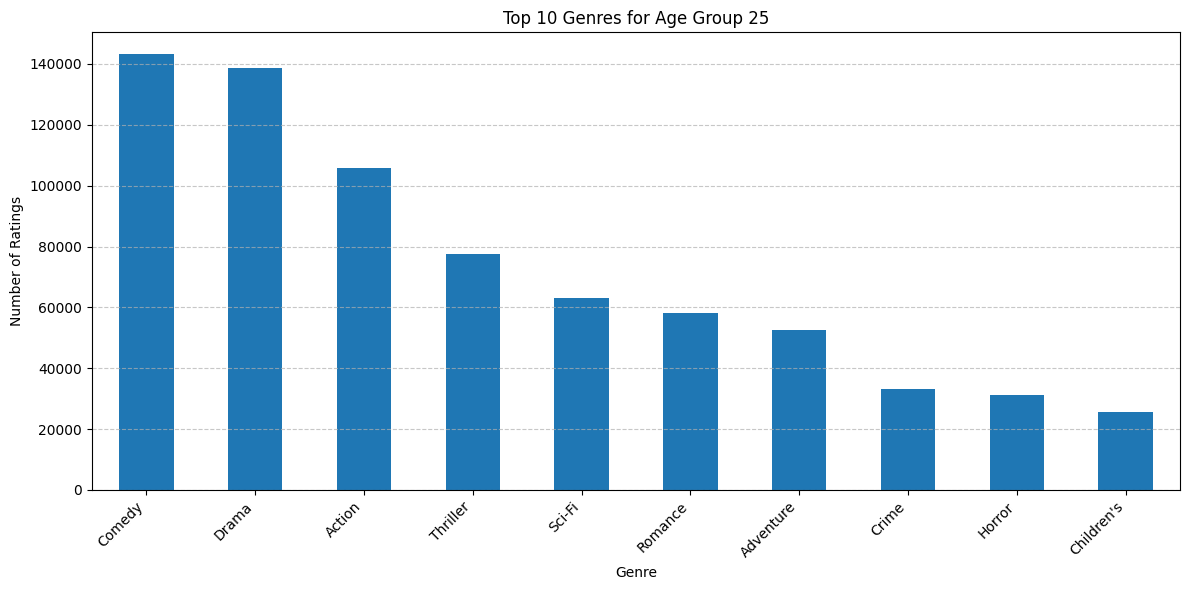

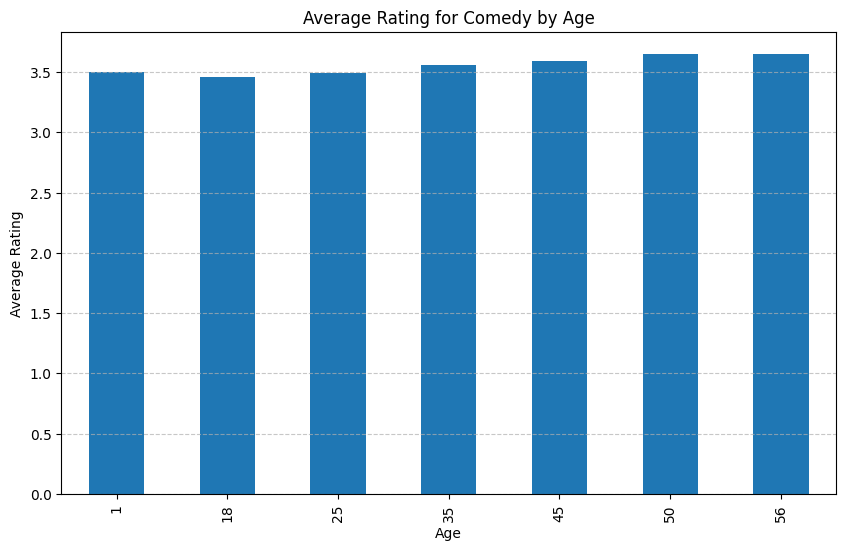

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Merge the dataframes
merged_df = pd.merge(dataset.ratings_df, dataset.users_df, left_on='u_nodes', right_on='user_id')
merged_df = pd.merge(merged_df, dataset.movies_df, left_on='v_nodes', right_on='movie_id')

# Drop redundant columns
merged_df = merged_df.drop(['u_nodes', 'v_nodes', 'timestamp', 'user_id', 'movie_id'], axis=1)

# Explore relationships between features and ratings

# Average rating by Gender
plt.figure(figsize=(6, 4))
merged_df.groupby('gender')['ratings'].mean().plot(kind='bar')
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average rating by Age
plt.figure(figsize=(10, 6))
merged_df.groupby('age')['ratings'].mean().plot(kind='bar')
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average rating by Occupation (show top N for readability)
plt.figure(figsize=(12, 6))
merged_df.groupby('occupation')['ratings'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Average Rating by Occupation (Top 15)')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average rating by Genre (handle multiple genres per movie)
# Split the genres string and create a new row for each genre
genre_ratings = merged_df.assign(genre=merged_df['genre'].str.split('|')).explode('genre')

plt.figure(figsize=(14, 6))
genre_ratings.groupby('genre')['ratings'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# For zip-code, plotting average rating per zip code directly might be too granular.
# Instead, let's look at the distribution of ratings across zip codes or perhaps a heat map if geographic data was available.
# As a simple illustration, let's see the number of ratings per zip code (top N)
plt.figure(figsize=(12, 6))
merged_df['zip-code'].value_counts().head(20).plot(kind='bar')
plt.title('Number of Ratings by Zip Code (Top 20)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# To illustrate how genre might relate to age, occupation, etc., we could look at which genres are popular within certain demographics.
# Example: Top genres for a specific age group
age_group = 25 # Example age group (25 corresponds to ages 18-24 in MovieLens 1M dataset's age codes)
age_group_genres = merged_df[merged_df['age'] == age_group].assign(genre=merged_df['genre'].str.split('|')).explode('genre')

plt.figure(figsize=(12, 6))
age_group_genres['genre'].value_counts().head(10).plot(kind='bar')
plt.title(f'Top 10 Genres for Age Group {age_group}')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Example: Average rating for a specific genre by age
specific_genre = 'Comedy'
genre_age_ratings = merged_df[merged_df['genre'].str.contains(specific_genre)].groupby('age')['ratings'].mean()

plt.figure(figsize=(10, 6))
genre_age_ratings.plot(kind='bar')
plt.title(f'Average Rating for {specific_genre} by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

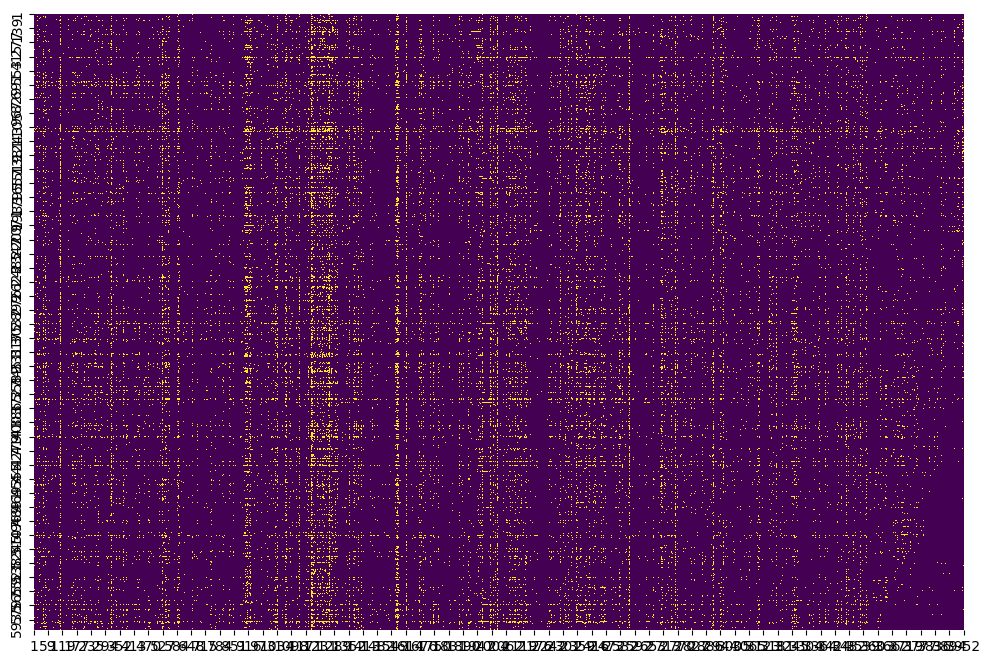

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

user_movie_matrix_100k = dataset.ratings_df.pivot(index='u_nodes', columns='v_nodes', values='ratings')

plt.figure(figsize=(12, 8))
sns.heatmap(user_movie_matrix_100k.notna(), cmap='viridis', cbar=False) # Using .notna() to visualize interactions (present or not)
plt.title('User-Movie Interaction Matrix ')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

# Model

## ALS

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark Colab").getOrCreate()

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import *

local_data_path = '/tmp/u.data'
!wget {data_url_100k} -O {local_data_path}

df_rating = spark.read.text(local_data_path).select(
    F.split(F.col('value'), '\t').alias('value')).select(
        F.col('value').getItem(0).cast(IntegerType()).alias('user'),
        F.col('value').getItem(1).cast(IntegerType()).alias("item"),
        F.col('value').getItem(2).cast(FloatType()).alias("rating"))

df_rating.printSchema()
df_rating.show(5)

--2025-07-02 15:12:57--  https://files.grouplens.org/datasets/movielens/ml-100k/u.data
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979173 (1.9M)
Saving to: ‘/tmp/u.data’

/tmp/u.data         100%[===================>]   1.89M  1.61MB/s    in 1.2s    

2025-07-02 15:12:59 (1.61 MB/s) - ‘/tmp/u.data’ saved [1979173/1979173]

root
 |-- user: integer (nullable = true)
 |-- item: integer (nullable = true)
 |-- rating: float (nullable = true)

+----+----+------+
|user|item|rating|
+----+----+------+
| 196| 242|   3.0|
| 186| 302|   3.0|
|  22| 377|   1.0|
| 244|  51|   2.0|
| 166| 346|   1.0|
+----+----+------+
only showing top 5 rows



In [ ]:
train, test = df_rating.randomSplit([0.8, 0.2])

In [ ]:
from pyspark.ml.recommendation import ALS

als = ALS(rank=5, maxIter=10, seed=0)
model = als.fit(train)

In [ ]:
predictions = model.transform(test.select(["user", "item"]))

In [ ]:
predictions.head(5)

[Row(user=1, item=4, prediction=3.8000314235687256),
 Row(user=1, item=11, prediction=3.9383413791656494),
 Row(user=1, item=22, prediction=3.969892740249634),
 Row(user=1, item=24, prediction=3.781562566757202),
 Row(user=1, item=25, prediction=3.3284223079681396)]

In [ ]:
ratesAndPreds = test.alias("test").join(predictions.alias("predictions"),
                          (F.col("test.user") == F.col("predictions.user")) & (F.col("test.item") == F.col("predictions.item")),
                          how='outer').select(F.col("test.user"), F.col("test.item"), F.col("test.rating"), F.col("predictions.prediction"))

In [ ]:
ratesAndPreds = ratesAndPreds.select([test.rating.alias("label"), F.col('prediction').alias("raw")])
ratesAndPreds = ratesAndPreds.withColumn("label", ratesAndPreds["label"].cast(FloatType()))

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol="raw", labelCol='label', metricName='rmse')
evaluator.evaluate(ratesAndPreds.dropna())

0.9178114677267928

## IGMC

In [ ]:
!pip uninstall torch-scatter torch-sparse

In [ ]:
%%capture
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html
!pip install torch-geometric

In [ ]:
from __future__ import print_function
import numpy as np
import random
import pandas as pd
from tqdm import tqdm
import os, sys, pdb, math, time
from copy import deepcopy
import multiprocessing as mp
import networkx as nx
import argparse
import scipy.io as sio
import scipy.sparse as ssp
import torch
from torch_geometric.data import Data, Dataset, InMemoryDataset
import torch.multiprocessing
torch.multiprocessing.set_sharing_strategy('file_system')
import pickle as pkl
import scipy.sparse as sp
from torch_geometric.data import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Construct data

In [ ]:
def subgraph_extraction_labeling(ind, Arow, Acol, h=1, sample_ratio=1.0,
                                 max_nodes_per_hop = None, u_features = None,
                                 v_features = None, class_values = None, y =1):
  # extract the h-hop enclosing subgraph around link 'ind'
  u_nodes, v_nodes = [ind[0]], [ind[1]]
  u_dist, v_dist = [0], [0]
  u_visited, v_visited = set([ind[0]]), set([ind[1]])
  u_fringe, v_fringe = set([ind[0]]), set([ind[1]])
  for dist in range(1, h+1):
    v_fringe, u_fringe = neighbors(u_fringe, Arow), neighbors(v_fringe, Acol)
    u_fringe = u_fringe - u_visited
    v_fringe = v_fringe - v_visited
    u_visited = u_visited.union(u_fringe)
    v_visited = v_visited.union(v_fringe)
    if sample_ratio < 1.0:
      u_fringe = random.sample(list(u_fringe), int(sample_ratio*len(u_fringe)))
      v_fringe = random.sample(list(v_fringe), int(sample_ratio*len(v_fringe)))
    if max_nodes_per_hop is not None:
      if max_nodes_per_hop < len(u_fringe):
        u_fringe = random.sample(list(u_fringe), max_nodes_per_hop)
      if max_nodes_per_hop < len(v_fringe):
        v_fringe = random.sample(list(v_fringe), max_nodes_per_hop)
    if len(u_fringe)  == 0 and len(v_fringe) == 0:
      break

    u_nodes = u_nodes + list(u_fringe)
    v_nodes = v_nodes + list(v_fringe)
    u_dist = u_dist + [dist]*len(u_fringe)
    v_dist = v_dist + [dist]*len(v_fringe)

  subgraph = Arow[u_nodes][:, v_nodes]
  # remove link between target nodes
  subgraph[0, 0] = 0

  # prepare pyg graph constructor input
  u, v, r = ssp.find(subgraph) #r is 1, 2,... (rating labels + 1)
  v += len(u_nodes)
  r = r - 1 # transform r back to rating label
  num_nodes = len(u_nodes) + len(v_nodes)
  node_labels = [x*2 for x in u_dist] + [x*2+1 for x in v_dist]
  max_node_label = 2*h + 1
  y = class_values[y]

  # get node features
  if u_features is not None:
    u_features = u_features[u_nodes]
  if v_features is not None:
    v_features = v_features[v_nodes]
  node_features = None
  if False:
    # directly use padded node features
    if u_features is not None and v_features is not None:
      u_extended = np.concatenate(
          [u_features, np.zeros([u_features.shape[0], v_features.shape[1]])], 1
      )
      v_extended = np.concatenate(
          [np.zeros([v_features.shape[0], u_features.shape[1]]), v_features], 1
      )
      node_features = np.concatenate([u_extended, v_extended], 0)
  if False:
    # use identity features (one-hot encodings of node idxes)
    u_ids = one_hot(u_nodes, Arow.shape[0] + Arow.shape[1])
    v_ids = one_hot([x+Arow.shape[0] for x in v_nodes], Arow.shape[0] + Arow.shape[1])

    node_ids = np.concatenate([u_ids, v_ids], 0)
    # node_features = np.concatenate([node_features, node_ids], 1)
    node_features = node_ids

  if True:
    # only output node features for the target user and item
    if u_features is not None and v_features is not None:
      node_features = [u_features[0], v_features[0]]

  return u, v, r, node_labels, max_node_label, y, node_features

def construct_pyg_graph(u, v, r, node_labels, max_node_label, y, node_features):
  u, v = torch.LongTensor(u), torch.LongTensor(v)
  r = torch.LongTensor(r)
  edge_index = torch.stack([torch.cat([u, v]), torch.cat([v, u])], 0)
  edge_type = torch.cat([r, r])
  x = torch.FloatTensor(one_hot(node_labels, max_node_label+1))
  y = torch.FloatTensor([y])
  data = Data(x, edge_index, edge_type = edge_type, y = y)

  if node_features is not None:
    if type(node_features) == list:
      u_feature, v_feature = node_features
      data.u_feature = torch.FloatTensor(u_feature.todense()).unsqueeze(0)
      data.v_feature = torch.FloatTensor(v_feature.todense()).unsqueeze(0)
    else:
      x2 = torch.FloatTensor(node_features)
      data.x = torch.cat([data.x, x2], 1)
  return data

def neighbors(fringe, A):
  # find all 1-hop neighbors of nodes in fringe from A
  return set(A[list(fringe)].indices)

def one_hot(idx, length):
  idx = np.array(idx)
  x = np.zeros([len(idx), length])
  x[np.arange(len(idx)), idx] = 1.0
  return x

class SparseRowIndexer:
  def __init__(self, csr_matrix):
    data = []
    indices = []
    indptr = []

    for row_start, row_end in zip(csr_matrix.indptr[:-1], csr_matrix.indptr[1:]):
      data.append(csr_matrix.data[row_start:row_end])
      indices.append(csr_matrix.indices[row_start:row_end])
      indptr.append(row_end - row_start)  #nnz of the row

    self.data = np.array(data, dtype = object)
    self.indices = np.array(indices, dtype = object)
    self.indptr = np.array(indptr, dtype = object)
    self.shape = csr_matrix.shape
  def __getitem__(self, row_selector):
    indices = np.concatenate(self.indices[row_selector])
    data = np.concatenate(self.data[row_selector])
    indptr = np.append(0, np.cumsum(self.indptr[row_selector]))
    shape = [indptr.shape[0] - 1, self.shape[1]]
    return ssp.csr_matrix((data, indices, indptr), shape = shape)

class SparseColIndexer:
  def __init__(self, csc_matrix):
    data = []
    indices = []
    indptr = []

    for col_start, col_end in zip(csc_matrix.indptr[:-1], csc_matrix.indptr[1:]):
      data.append(csc_matrix.data[col_start:col_end])
      indices.append(csc_matrix.data[col_start:col_end])
      indptr.append(col_end - col_start)

    self.data = np.array(data, dtype = object)
    self.indices = np.array(indices, dtype = object)
    self.indptr = np.array(indptr, dtype = object)
    self.shape = csc_matrix.shape

  def __getitem__(self, col_selector):
    indices = np.concatenate(self.indices[col_selector])
    data = np.concatenate(self.data[col_selector])
    indptr = np.append(0, np.cumsum(self.indptr[col_selector]))

    shape = [self.shape[0], indptr.shape[0] - 1]
    return ssp.csc_matrix((data, indices, indptr), shape = shape)


def links2subgraphs(Arow, Acol, links, labels, h=1, sample_ratio = 1.0,
                    max_nodes_per_hop = None, u_features = None, v_features = None,
                    class_values = None, parallel = True):
  # Extract enclosing subgraphs
  print('Enclosing subgraph extraction begins...')
  g_list = []
  if not parallel:
    with tqdm(total = len(links[0])) as pbar:
      for i, j, g_label in zip(links[0], links[1], labels):
        tmp = subgraph_extraction_labeling((i, j), Arow, Acol, h, sample_ratio,
                                           max_nodes_per_hop, u_features, v_features,
                                           class_values, g_label)
        data = construct_pyg_graph(*tmp)
        g_list.append(data)
        pbar.update(1)
  else:
    start = time.time()
    pool = mp.Pool(mp.cpu_count())
    results = pool.starmap_async(
        subgraph_extraction_labeling,
        [
         ((i,j), Arow, Acol, h, sample_ratio, max_nodes_per_hop, u_features,
          v_features, class_values, g_label)
         for i, j, g_label in zip(links[0], links[1], labels)
        ]
    )
    remaining = results._number_left
    pbar = tqdm(total = remaining)
    while True:
      pbar.update(remaining - results._number_left)
      if results.ready(): break
      remaining = results._number_left
      time.sleep(1)
    results = results.get()
    pool.close()
    pbar.close()
    end = time.time()
    print("Time elapsed for subgraph extraction: {}s".format(end-start))
    print("Tranforming to pytorch_geometric graphs...")
    g_list = []
    pbar = tqdm(total = len(results))
    while results:
      tmp = results.pop()
      g_list.append(construct_pyg_graph(*tmp))
      pbar.update(1)
    pbar.close()
    end2 = time.time()
    print("Time elapsed for transforming to pytorch_geometric graphs: {}s".format(end2-end))
  return g_list

class MyDataset(InMemoryDataset):
  def __init__(self, root, A, links, labels, h, sample_ratio, max_nodes_per_hop,
               u_features, v_features, class_values, max_num = None, parallel=True):
    self.Arow = SparseRowIndexer(A)
    self.Acol = SparseColIndexer(A.tocsc())
    self.links = links
    self.labels = labels
    self.h = h
    self.sample_ratio = sample_ratio
    self.max_nodes_per_hop = max_nodes_per_hop
    self.u_features = u_features
    self.v_features = v_features
    self.class_values = class_values
    self.parallel = parallel
    self.max_num = max_num
    if max_num is not None:
      np.random.seed(123)
      num_links = len(links[0])
      perm = np.random.permutation(num_links)
      perm = perm[:max_num]
      self.links = (links[0][perm], links[1][perm])
      self.labels = labels[perm]
    super(MyDataset, self).__init__(root)
    self.data, self.slices = torch.load(self.processed_paths[0])

  @property
  def processed_file_names(self):
    name = 'data.pt'
    if self.max_num is not None:
      name = 'data_{}.pt'.format(self.max_num)
    return [name]

  def process(self):
    # Extract enclosing subgraphs and save to disk
    data_list = links2subgraphs(self.Arow, self.Acol, self.links, self.labels, self.h,
                                self.sample_ratio, self.max_nodes_per_hop,
                                self.u_features, self.v_features,
                                self.class_values, self.parallel)

    data, slices = self.collate(data_list)
    torch.save((data, slices), self.processed_paths[0])
    del data_list

class MyDynamicDataset(Dataset):
  def __init__(self, root, A, links, labels, h, sample_ratio, max_nodes_per_hop,
                u_features, v_features, class_values, max_num=None):
    super(MyDynamicDataset, self).__init__(root)
    self.Arow = SparseRowIndexer(A)
    self.Acol = SparseColIndexer(A.tocsc())
    self.links = links
    self.labels = labels
    self.h = h
    self.sample_ratio = sample_ratio
    self.max_nodes_per_hop = max_nodes_per_hop
    self.u_features = u_features
    self.v_features = v_features
    self.class_values = class_values
    if max_num is not None:
      np.random.seed(123)
      num_links = len(links[0])
      perm = np.random.permutation(num_links)
      perm = perm[:max_num]
      self.links = (links[0][perm], links[1][perm])
      self.labels = labels[perm]

  def len(self):
    return len(self.links[0])

  def get(self, idx):
    i, j = self.links[0][idx], self.links[1][idx]
    g_label = self.labels[idx]
    tmp = subgraph_extraction_labeling(
      (i, j), self.Arow, self.Acol, self.h, self.sample_ratio, self.max_nodes_per_hop,
      self.u_features, self.v_features, self.class_values, g_label
    )
    return construct_pyg_graph(*tmp)

## Define Model

In [ ]:
import torch.nn as nn
from torch.nn import Linear, Conv1d
from torch_geometric.nn import GCNConv, RGCNConv, global_sort_pool, global_add_pool
from torch_geometric.utils import dropout_adj
import pdb

class GNN(torch.nn.Module):
  #a base GNN class, GCN message passing + sum_pooling
  def __init__(self, dataset, gconv = GCNConv, latent_dim=[32, 32, 32, 1],
               regression = False, adj_dropout = 0.2,
               force_undirected = False):
    super(GNN, self).__init__()
    self.regression = regression
    self.adj_dropout = adj_dropout
    self.force_undirected = force_undirected
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0]))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1]))
    self.lin1 = Linear(sum(latent_dim), 128)
    if self.regression:
      self.lin2 = Linear(128, 1)
    else:
      self.lin2 = Linear(128, dataset.num_classes)

  def reset_parameters(self):
    for conv in self.convs:
      conv.reset_parameters()
    self.lin1.reset_parameters()
    self.lin2.reset_parameters()

  def forward(self, data):
    x, edge_index, batch = data.x, data.edge_index, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_type = dropout_adj(edge_index, edge_type, p=self.adj_dropout,
                                          force_undirected=self.force_undirected,
                                          num_nodes=len(x), training=self.training
        )
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)
    x = global_add_pool(concat_states, batch)
    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0]
    else:
      return F.log_softmax(x, dim=-1)

  def __repr__(self):
    return self.__class__.__name__

class DGCNN(GNN):
  # DGCNN from [Zhang et al. AAAI 2018], GCN message passing + SortPooling
  def __init__(self, dataset, gconv=GCNConv, latent_dim=[32, 32, 32, 1], k=30,
               regression=False, adj_dropout=0.2, force_undirected=False):
    super(DGCNN, self).__init__(dataset, gconv, latent_dim,
                                regression, adj_dropout, force_undirected
    )
    if k < 1:  # transform percentile to number
      node_nums = sorted([g.num_nodes for g in dataset])
      k = node_nums[int(math.ceil(k * len(node_nums)))-1]
      k = max(10, k)  # no smaller than 10
    self.k = int(k)
    print('k used in sortpooling is:', self.k)
    conv1d_channels = [16, 32]
    conv1d_activation = nn.ReLU()
    self.total_latent_dim = sum(latent_dim)
    conv1d_kws = [self.total_latent_dim, 5]
    self.conv1d_params1 = Conv1d(1, conv1d_channels[0], conv1d_kws[0], conv1d_kws[0])
    self.maxpool1d = nn.MaxPool1d(2, 2)
    self.conv1d_params2 = Conv1d(conv1d_channels[0], conv1d_channels[1], conv1d_kws[1], 1)
    dense_dim = int((k - 2) / 2 + 1)
    self.dense_dim = (dense_dim - conv1d_kws[1] + 1) * conv1d_channels[1]
    self.lin1 = Linear(self.dense_dim, 128)

  def reset_parameters(self):
    for conv in self.convs:
      conv.reset_parameters()
    self.conv1d_params1.reset_parameters()
    self.conv1d_params2.reset_parameters()
    self.lin1.reset_parameters()
    self.lin2.reset_parameters()

  def forward(self, data):
    x, edge_index, batch = data.x, data.edge_index, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_type = dropout_adj(edge_index, edge_type, p=self.adj_dropout,
                                          force_undirected=self.force_undirected,
                                          num_nodes=len(x), training=self.training
      )
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)
    x = global_sort_pool(concat_states, batch, self.k)  # batch * (k*hidden)
    x = x.unsqueeze(1)  # batch * 1 * (k*hidden)
    x = F.relu(self.conv1d_params1(x))
    x = self.maxpool1d(x)
    x = F.relu(self.conv1d_params2(x))
    x = x.view(len(x), -1)  # flatten
    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0]
    else:
      return F.log_softmax(x, dim=-1)

class DGCNN_RS(DGCNN):
  # A DGCNN model using RGCN convolution to take consideration of edge types.
  def __init__(self, dataset, gconv=RGCNConv, latent_dim=[32, 32, 32, 1], k=30,
               num_relations=5, num_bases=2, regression=False, adj_dropout=0.2,
               force_undirected=False):
    super(DGCNN_RS, self).__init__(dataset, GCNConv, latent_dim, k,
                                   regression, adj_dropout=adj_dropout,
                                   force_undirected=force_undirected
    )
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0], num_relations, num_bases))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1], num_relations, num_bases))

  def forward(self, data):
    x, edge_index, edge_type, batch = data.x, data.edge_index, data.edge_type, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_type = dropout_adj(edge_index, edge_type, p=self.adj_dropout,
                                          force_undirected=self.force_undirected,
                                          num_nodes=len(x), training=self.training
      )
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index, edge_type))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)
    x = global_sort_pool(concat_states, batch, self.k)  # batch * (k*hidden)
    x = x.unsqueeze(1)  # batch * 1 * (k*hidden)
    x = F.relu(self.conv1d_params1(x))
    x = self.maxpool1d(x)
    x = F.relu(self.conv1d_params2(x))
    x = x.view(len(x), -1)  # flatten
    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0]
    else:
      return F.log_softmax(x, dim=-1)

class IGMC(GNN):
  # The GNN model of Inductive Graph-based Matrix Completion.
  # Use RGCN convolution + center-nodes readout.
  def __init__(self, dataset, gconv=RGCNConv, latent_dim=[32, 32, 32, 32],
               num_relations=5, num_bases=2, regression=False, adj_dropout=0.2,
               force_undirected=False, side_features=False, n_side_features=0,
               multiply_by=1):
    super(IGMC, self).__init__(dataset, GCNConv, latent_dim,
                               regression, adj_dropout, force_undirected
    )
    self.multiply_by = multiply_by
    self.convs = torch.nn.ModuleList()
    self.convs.append(gconv(4, latent_dim[0], num_relations, num_bases))
    for i in range(0, len(latent_dim)-1):
      self.convs.append(gconv(latent_dim[i], latent_dim[i+1], num_relations, num_bases))
    self.lin1 = Linear(2*sum(latent_dim), 128)
    self.side_features = side_features
    if side_features:
      self.lin1 = Linear(2*sum(latent_dim)+n_side_features, 128)

  def forward(self, data):
    start = time.time()
    x, edge_index, edge_type, batch = data.x, data.edge_index, data.edge_type, data.batch
    if self.adj_dropout > 0:
      edge_index, edge_type = dropout_adj(edge_index, edge_type, p=self.adj_dropout,
                                          force_undirected=self.force_undirected,
                                          num_nodes=len(x), training=self.training
      )
    concat_states = []
    for conv in self.convs:
      x = torch.tanh(conv(x, edge_index, edge_type))
      concat_states.append(x)
    concat_states = torch.cat(concat_states, 1)

    users = data.x[:, 0] == 1
    items = data.x[:, 1] == 1
    x = torch.cat([concat_states[users], concat_states[items]], 1)
    if self.side_features:
      x = torch.cat([x, data.u_feature, data.v_feature], 1)

    x = F.relu(self.lin1(x))
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.lin2(x)
    if self.regression:
      return x[:, 0] * self.multiply_by
    else:
      return F.log_softmax(x, dim=-1)

## Training utilities

In [ ]:
import torch.nn.functional as F
from sklearn.model_selection import StratifiedKFold
from torch.optim import Adam
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

In [ ]:
def train(model, optimizer, loader, device, regression = False, ARR = 0, show_progress= False, epoch = None):
  model.train()
  total_loss = 0
  if show_progress:
    pbar = tqdm(loader)
  else:
    pbar = loader
  for data in pbar:
    optimizer.zero_grad()
    data = data.to(device)
    out = model(data)
    if regression:
      loss = F.mse_loss(out, data.y.view(-1))
    else:
      loss = F.nll_loss(out, data.y.view(-1))
    if show_progress:
      pbar.set_description('Epoch {}, batch loss: {}'.format(epoch, loss.item()))
    if ARR != 0:
      for gconv in model.convs:
        w = torch.matmul(gconv.comp,
                         gconv.weight.view(gconv.num_bases, -1)
        ).view(gconv.num_relations, gconv.in_channels, gconv.out_channels)
        reg_loss = torch.sum((w[1:, :, :] - w[:-1, :, :])**2)
        loss += ARR * reg_loss
    loss.backward()
    total_loss += loss.item() * num_graphs(data)
    optimizer.step()
  return total_loss / len(loader.dataset)

def eval_loss(model, loader, device, regression=False, show_progress= False):
  model.eval()
  loss = 0
  if show_progress:
    print('Testing begins ...')
    pbar = tqdm(loader)
  else:
    pbar = loader
  for data in pbar:
    data = data.to(device)
    with torch.no_grad():
      out = model(data)
    if regression:
      loss += F.mse_loss(out, data.y.view(-1), reduction='sum').item()
    else:
      loss += F.nll_loss(out, data.y.view(-1), reduction='sum').item()
    torch.cuda.empty_cache()
  return loss / len(loader.dataset)

def eval_rmse(model, loader, device, show_progress = False):
  mse_loss = eval_loss(model, loader, device, True, show_progress)
  rmse = math.sqrt(mse_loss)
  return rmse

def eval_loss_ensemble(model, checkpoints, loader, device, regression = False, show_progress = False):
  loss = 0
  Outs = []
  ys = []
  for i, checkpoint in enumerate(checkpoints):
    if show_progress:
      print('Testing begins...')
      pbar = tqdm(loader)
    else:
      pbar = loader
    model.load_state_dict(torch.load(checkpoint))
    model.eval()
    outs = []
    if i == 0:
      ys = []
    for data in pbar:
      data = data.to(device)
      if i == 0:
        ys.append(data.y.view(-1))
      with torch.no_grad():
        out = model(data)
        outs.append(out)
    if i == 0:
      ys = torch.cat(ys, 0)
    outs = torch.cat(outs, 0).view(-1 , 1)
    Outs.append(outs)
  Outs = torch.cat(Outs, 1).mean(1)
  if regression:
    loss += F.mse_loss(Outs, ys, reduction='sum').item()
  else:
    loss += F.nll_loss(Outs, ys, reduction='sum').item()

  return loss / len(loader.dataset)

def eval_rmse_ensemble(model, checkpoints, loader, device, show_progress = False):
  mse_loss = eval_loss_ensemble(model ,checkpoints, loader, device, True, show_progress = False)
  rmse = math.sqrt(mse_loss)
  return rmse

In [ ]:
def train_multiple_epochs(train_dataset, test_dataset, model,
                          epochs, batch_size, lr, lr_decay_factor,
                          lr_decay_step_size, weight_decay, ARR = 0,
                          test_freq = 1, logger = None, continue_from = None,
                          res_dir = None, cpu_only = False):
  rmses = []

  if train_dataset.__class__.__name__ == 'MyDynamicDataset':
    num_workers = mp.cpu_count()
  else:
    num_workers = 2

  train_loader = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = num_workers)

  if test_dataset.__class__.__name__ == 'MyDynamicDataset':
    num_workers = mp.cpu_count()
  else:
    num_workers = 2

  test_loader = DataLoader(test_dataset, batch_size, shuffle = False, num_workers = num_workers)

  model.to(device).reset_parameters()
  optimizer = Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
  start_epoch = 1
  if continue_from is not None:
    if(cpu_only):
      model.load_state_dict(
        torch.load(
            os.path.join(res_dir, 'model_checkpoint{}.pth'.format(continue_from)),
            map_location=torch.device('cpu')
            )
      )
      optimizer.load_state_dict(
          torch.load(
              os.path.join(res_dir, 'optimizer_checkpoint{}.pth'.format(continue_from)),
              map_location=torch.device('cpu')
              )
      )
    else:
      model.load_state_dict(
        torch.load(os.path.join(res_dir, 'model_checkpoint{}.pth'.format(continue_from)))
      )
      optimizer.load_state_dict(
          torch.load(os.path.join(res_dir, 'optimizer_checkpoint{}.pth'.format(continue_from)))
      )

    start_epoch = continue_from + 1
    epochs -= continue_from
  if torch.cuda.is_available():
    torch.cuda.synchronize()

  batch_pbar = len(train_dataset) >= 100000
  t_start = time.perf_counter()
  if not batch_pbar:
    pbar = tqdm(range(start_epoch, epochs + start_epoch))
  else:
    pbar = range(start_epoch, epochs + start_epoch)
  for epoch in pbar:
    train_loss = train(model, optimizer, train_loader, device, regression = True,
                       ARR = ARR, show_progress = batch_pbar, epoch=epoch)
    if epoch % test_freq == 0:
      rmses.append(eval_rmse(model, test_loader, device, show_progress = batch_pbar))
    else:
      rmses.append(np.nan)
    eval_info = {
      'epoch': epoch,
      'train_loss': train_loss,
      'test_rmse': rmses[-1],
    }

    if not batch_pbar:
      pbar.set_description(
          'Epoch {}, train loss {:.6f}, test rmse {:.6f}'.format(*eval_info.values())
      )
    else:
      print('Epoch {}, train loss {:.6f}, test rmse {:.6f}'.format(*eval_info.values()))

    if epoch % lr_decay_step_size == 0:
      for param_group in optimizer.param_groups:
        param_group['lr'] = lr_decay_factor * param_group['lr']

    if logger is not None:
      logger(eval_info, model, optimizer)

  t_end = time.perf_counter()
  duration = t_end - t_start

  print('Final Test RMSE: {:.6f}, Duration: {:.6f}'.format(rmses[-1], duration))

  return rmses[-1]

def test_once(test_dataset, model, batch_size, logger = None, ensemble = False, checkpoints = None):
  test_loader = DataLoader(test_dataset, batch_size, shuffle = False)
  model.to(device)
  t_start = time.perf_counter()
  if ensemble and checkpoints:
    rmse = eval_rmse_ensemble(model, checkpoints, test_loader, device, show_progress = True)
  else:
    rmse = eval_rmse(model, test_loader, device, show_progress = True)

  t_end = time.perf_counter()
  duration = t_end - t_start
  print('Test Once RMSE: {:.6f}, Duration: {:.6f}'.format(rmse, duration))
  epoch_info = 'test_once' if not ensemble else 'ensemble'
  eval_info = {
      'epoch': epoch_info,
      'train_loss': 0,
      'test_rmse': rmse,
  }

  if logger is not None:
    logger(eval_info, None, None)

  return rmse

def num_graphs(data):
  if data.batch is not None:
    return data.num_graphs
  else:
    return data.x.size(0)

## Load data and train model

In [ ]:
import numpy as np
import pandas as pd
import random
import scipy.sparse as sp

def map_data(data):
  """
  Map data to proper indices in case they are not in a continues [0,N) range
  """
  uniq = list(set(data))
  id_dict = {old: new for new, old in enumerate(sorted(uniq))}
  data = np.array([id_dict[x] for x in data])
  n = len(uniq)

  return data, id_dict, n

def process_data(dataset, seed = 1234, verbose = True):
  num_users, num_items, u_nodes_ratings, v_nodes_ratings, ratings, u_features, v_features = None, None, None, None, None, None, None

  # shuffle data
  data_array = dataset.ratings_df.values.tolist()
  random.seed(seed)
  random.shuffle(data_array)
  data_array = np.array(data_array)

  u_nodes_ratings = data_array[:, 0].astype(np.int64)
  v_nodes_ratings = data_array[:, 1].astype(np.int64)
  ratings = data_array[:, 2].astype(np.float32)

  u_nodes_ratings, u_dict, num_users = map_data(u_nodes_ratings)
  v_nodes_ratings, v_dict, num_items = map_data(v_nodes_ratings)

  u_nodes_ratings, v_nodes_ratings = u_nodes_ratings.astype(np.int64), v_nodes_ratings.astype(np.int64)
  ratings = ratings.astype(np.float32)

  genres = []
  for s in dataset.movies_df['genre'].values:
    genres.extend(s.split('|'))

  genres = list(set(genres))
  num_genres = len(genres)

  genres_dict = {g: idx for idx, g in enumerate(genres)}

  # Creating 0 or 1 valued features for all genres
  v_features = np.zeros((num_items, num_genres), dtype=np.float32)
  for movie_id, s in zip(dataset.movies_df['movie_id'].values.tolist(), dataset.movies_df['genre'].values.tolist()):
    # Check if movie_id was listed in ratings file and therefore in mapping dictionary
    if movie_id in v_dict.keys():
      gen = s.split('|')
      for g in gen:
        v_features[v_dict[movie_id], genres_dict[g]] = 1.

  cols = dataset.users_df.columns.values[1:]

  cntr = 0
  feat_dicts = []
  for header in cols:
    d = dict()
    feats = np.unique(dataset.users_df[header].values).tolist()
    d.update({f: i for i, f in enumerate(feats, start=cntr)})
    feat_dicts.append(d)
    cntr += len(d)

  num_feats = sum(len(d) for d in feat_dicts)

  u_features = np.zeros((num_users, num_feats), dtype=np.float32)
  for _, row in dataset.users_df.iterrows():
    u_id = row['user_id']
    if u_id in u_dict.keys():
      for k, header in enumerate(cols):
        u_features[u_dict[u_id], feat_dicts[k][row[header]]] = 1.

  u_features = sp.csr_matrix(u_features)
  v_features = sp.csr_matrix(v_features)

  return num_users, num_items, u_nodes_ratings, v_nodes_ratings, ratings, u_features, v_features

In [ ]:
def create_trainvaltest_split(dataset, seed=1212, testing=False,
               verbose=True, rating_map=None,
               post_rating_map=None, ratio=1.0):
  num_users, num_items, u_nodes, v_nodes, ratings, u_features, v_features = process_data(dataset, seed=seed, verbose=verbose)

  if rating_map is not None:
    for i, x in enumerate(ratings):
      ratings[i] = rating_map[x]

  rating_dict = {r: i for i, r in enumerate(np.sort(np.unique(ratings)).tolist())}

  # number of test and validation edges

  print("Spliting the dataset ...")
  num_test = int(np.ceil(ratings.shape[0] * 0.1))
  num_val = int(np.ceil(ratings.shape[0] * 0.9 * 0.05))
  num_train = ratings.shape[0] - num_val - num_test

  pairs_nonzero = np.vstack([u_nodes, v_nodes]).transpose()

  train_pairs_idx = pairs_nonzero[0:int(num_train*ratio)]
  val_pairs_idx = pairs_nonzero[num_train:num_train + num_val]
  test_pairs_idx = pairs_nonzero[num_train + num_val:]

  u_test_idx, v_test_idx = test_pairs_idx.transpose()
  u_val_idx, v_val_idx = val_pairs_idx.transpose()
  u_train_idx, v_train_idx = train_pairs_idx.transpose()

  # create labels
  all_labels = np.array([rating_dict[r] for r in ratings], dtype=np.int32)
  train_labels = all_labels[0:int(num_train*ratio)]
  val_labels = all_labels[num_train:num_train + num_val]
  test_labels = all_labels[num_train + num_val:]

  if testing:
    u_train_idx = np.hstack([u_train_idx, u_val_idx])
    v_train_idx = np.hstack([v_train_idx, v_val_idx])
    train_labels = np.hstack([train_labels, val_labels])

  class_values = np.sort(np.unique(ratings))

  # make training adjacency matrix
  if post_rating_map is None:
    data = train_labels + 1.
  else:
    data = np.array([post_rating_map[r] for r in class_values[train_labels]]) + 1.
  data = data.astype(np.float32)

  rating_mx_train = sp.csr_matrix((data, [u_train_idx, v_train_idx]),
                                  shape=[num_users, num_items], dtype=np.float32)

  return u_features, v_features, rating_mx_train, train_labels, u_train_idx, v_train_idx, val_labels, u_val_idx, v_val_idx, test_labels, u_test_idx, v_test_idx, class_values

In [ ]:
u_features, v_features, adj_train, train_labels, train_u_indices, train_v_indices, val_labels, val_u_indices, val_v_indices, test_labels, test_u_indices, test_v_indices, class_values = create_trainvaltest_split(dataset, 1212, False, True, None, None, 1.0)

Spliting the dataset ...


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!mkdir ml-1m ml-1m/train ml-1m/test ml-1m/val

In [ ]:
dataset_class = 'MyDynamicDataset'
train_indices = (train_u_indices, train_v_indices)
val_indices = (val_u_indices, val_v_indices)
test_indices = (test_u_indices, test_v_indices)
train_graphs = eval(dataset_class)(
    'ml-1m/train',
    adj_train,
    train_indices,
    train_labels,
    1,
    1.0,
    100,
    u_features,
    v_features,
    class_values,
    max_num=None
)

test_graphs = eval(dataset_class)(
    'ml-1m/test',
    adj_train,
    test_indices,
    test_labels,
    1,
    1.0,
    100,
    u_features,
    v_features,
    class_values,
    max_num= None
)

val_graphs = eval(dataset_class)(
    'ml-1m/val',
    adj_train,
    val_indices,
    val_labels,
    1,
    1.0,
    100,
    u_features,
    v_features,
    class_values,
    max_num= None
)

num_relations = len(class_values)
multiply_by = 1

model = IGMC(train_graphs, latent_dim = [32, 32, 32, 32],
             num_relations = num_relations, num_bases = 4,
             regression = True, adj_dropout = 0.2, force_undirected = False,
             side_features = False, n_side_features = 0, multiply_by = 1
)

In [ ]:
val_graphs.len()

45010

In [ ]:
def logger(info, model, optimizer):
  epoch, train_loss, test_rmse = info['epoch'], info['train_loss'], info['test_rmse']
  with open(os.path.join('ml-1m/train/', 'log.txt'), 'a') as f:
    f.write('Epoch {}, train loss {:.4f}, test rmse {:.6f}\n'.format(epoch, train_loss, test_rmse))
  if type(epoch) == int and epoch % args['save_interval'] == 0:
    print('Saving model states...')
    model_name = os.path.join('ml-1m/train/', 'model_checkpoint{}.pth'.format(epoch))
    optimizer_name = os.path.join(
        'ml-1m/train/', 'optimizer_checkpoint{}.pth'.format(epoch)
    )
    if model is not None:
      torch.save(model.state_dict(), model_name)
    if optimizer is not None:
      torch.save(optimizer.state_dict(), optimizer_name)

In [ ]:
args = {
    'save_interval': 1
}
train_multiple_epochs(
        train_graphs,
        val_graphs,
        model,
        40,
        50,
        1e-3,
        lr_decay_factor = 0.1 ,
        lr_decay_step_size = 20,
        weight_decay = 0,
        ARR = 0.001,
        test_freq = 1,
        logger = logger,
        continue_from = None,
        res_dir= 'ml-1m/train',
        cpu_only = True
    )

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
  0%|          | 0/17104 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'dropout_adj' is deprecated, use 'dropout_edge' instead
  warnings.warn(out)
Epoch 1, batch loss: 1.188161015510559: 100%|██████████| 17104/17104 [46:18<00:00,  6.16it/s]


Testing begins ...


  0%|          | 0/901 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 901/901 [02:05<00:00,  7.16it/s]


Epoch 1, train loss 1.256602, test rmse 1.069997
Saving model states...


Epoch 2, batch loss: 1.1754893064498901:   6%|▌         | 1031/17104 [02:48<43:41,  6.13it/s]


KeyboardInterrupt: 

In [ ]:
args = {
    save_interval: 1
}

args.save_interval

AttributeError: 'dict' object has no attribute 'save_interval'

 # Evaluation

In [ ]:
test_once(test_graphs, model, batch_size=10)

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Testing begins ...


  0%|          | 0/10003 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
  0%|          | 23/10003 [00:00<06:14, 26.66it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
  1%|          | 58/10003 [00:03<15:40, 10.57it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
  1%|          | 69/10003 [00:04<28:36,  5.79it/s]/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure 

Test Once RMSE: 1.039139, Duration: 419.114947


1.0391391149251126

# Dump and save the model

In [ ]:
import joblib

joblib.dump(model, 'model.pkl')